In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from NegativeClassOptimization import datasets, ml, visualisations
from NegativeClassOptimization import utils
from NegativeClassOptimization import preprocessing

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
df_o = pd.read_csv(
    "../data/openset_performance_logistic.tsv",
    sep='\t',
)

df_o["ag"] = df_o["task_1"].apply(lambda x: datasets.ClassificationTask.init_from_str(x).ag_pos)
df_o["task_1_type"] = df_o["task_1"].apply(lambda x: datasets.ClassificationTask.init_from_str(x).task_type.to_str())
df_o["task_2_type"] = df_o["task_2"].apply(lambda x: datasets.ClassificationTask.init_from_str(x).task_type.to_str())

df_o.head()

,task_1,task_2,acc,recall,precision,f1,ag,task_1_type,task_2_type
0,HIGH_VS_95LOW__3VRL__auto__0__42,HIGH_VS_95LOW__3VRL__auto__0__42,0.996600,0.998,0.995213,0.996605,3VRL,high_vs_95low,high_vs_95low
1,HIGH_VS_95LOW__3VRL__auto__0__42,HIGH_VS_LOOSER__3VRL__auto__0__42,0.758500,0.998,0.674780,0.805163,3VRL,high_vs_95low,high_vs_looser
2,HIGH_VS_95LOW__3VRL__auto__0__42,ONE_VS_NINE__3VRL__auto__0__42,0.912356,0.998,0.852117,0.919307,3VRL,high_vs_95low,1v9
3,HIGH_VS_95LOW__3VRL__auto__0__42,HIGH_VS_95LOW__3VRL__auto__1__42,0.996600,0.998,0.995213,0.996605,3VRL,high_vs_95low,high_vs_95low
4,HIGH_VS_95LOW__3VRL__auto__0__42,HIGH_VS_LOOSER__3VRL__auto__1__42,0.758500,0.998,0.674780,0.805163,3VRL,high_vs_95low,high_vs_looser


In [3]:
df_o["model_task"] = df_o["task_1_type"].apply(lambda x: visualisations.PlotParams.map_task_type_to_clean[x])
df_o["test_task"] = df_o["task_2_type"].apply(lambda x: visualisations.PlotParams.map_task_type_to_clean[x])
df_o_agg = df_o.groupby(["ag", "model_task", "test_task"])["acc"].mean().reset_index()
df_o_agg.head()

,ag,model_task,test_task,acc
0,1ADQ,vs 1,vs 1,0.659807
1,1ADQ,vs 1,vs 9,0.664974
2,1ADQ,vs 1,vs Non-binder,0.592801
3,1ADQ,vs 1,vs Weak,0.574781
4,1ADQ,vs 9,vs 1,0.916300


In [4]:
df_o_agg.groupby(["model_task", "test_task"]).size()

model_task     test_task    
vs 1           vs 1             10
               vs 9             10
               vs Non-binder    10
               vs Weak          10
vs 9           vs 1             10
               vs 9             10
               vs Non-binder    10
               vs Weak          10
vs Non-binder  vs 1             10
               vs 9             10
               vs Non-binder    10
               vs Weak          10
vs Weak        vs 1             10
               vs 9             10
               vs Non-binder    10
               vs Weak          10
dtype: int64

In [7]:
## PLOT parameters from same nb as below
task_order = visualisations.PlotParams.order_tasks_clean.copy()
cmap = [
    # Selection from Dutch Field
    "#00bfa0",  # Dark Green
    "#0bb4ff",  # Blue
    "#e60049",  # Red
    "#ff8800",  # Orange
]

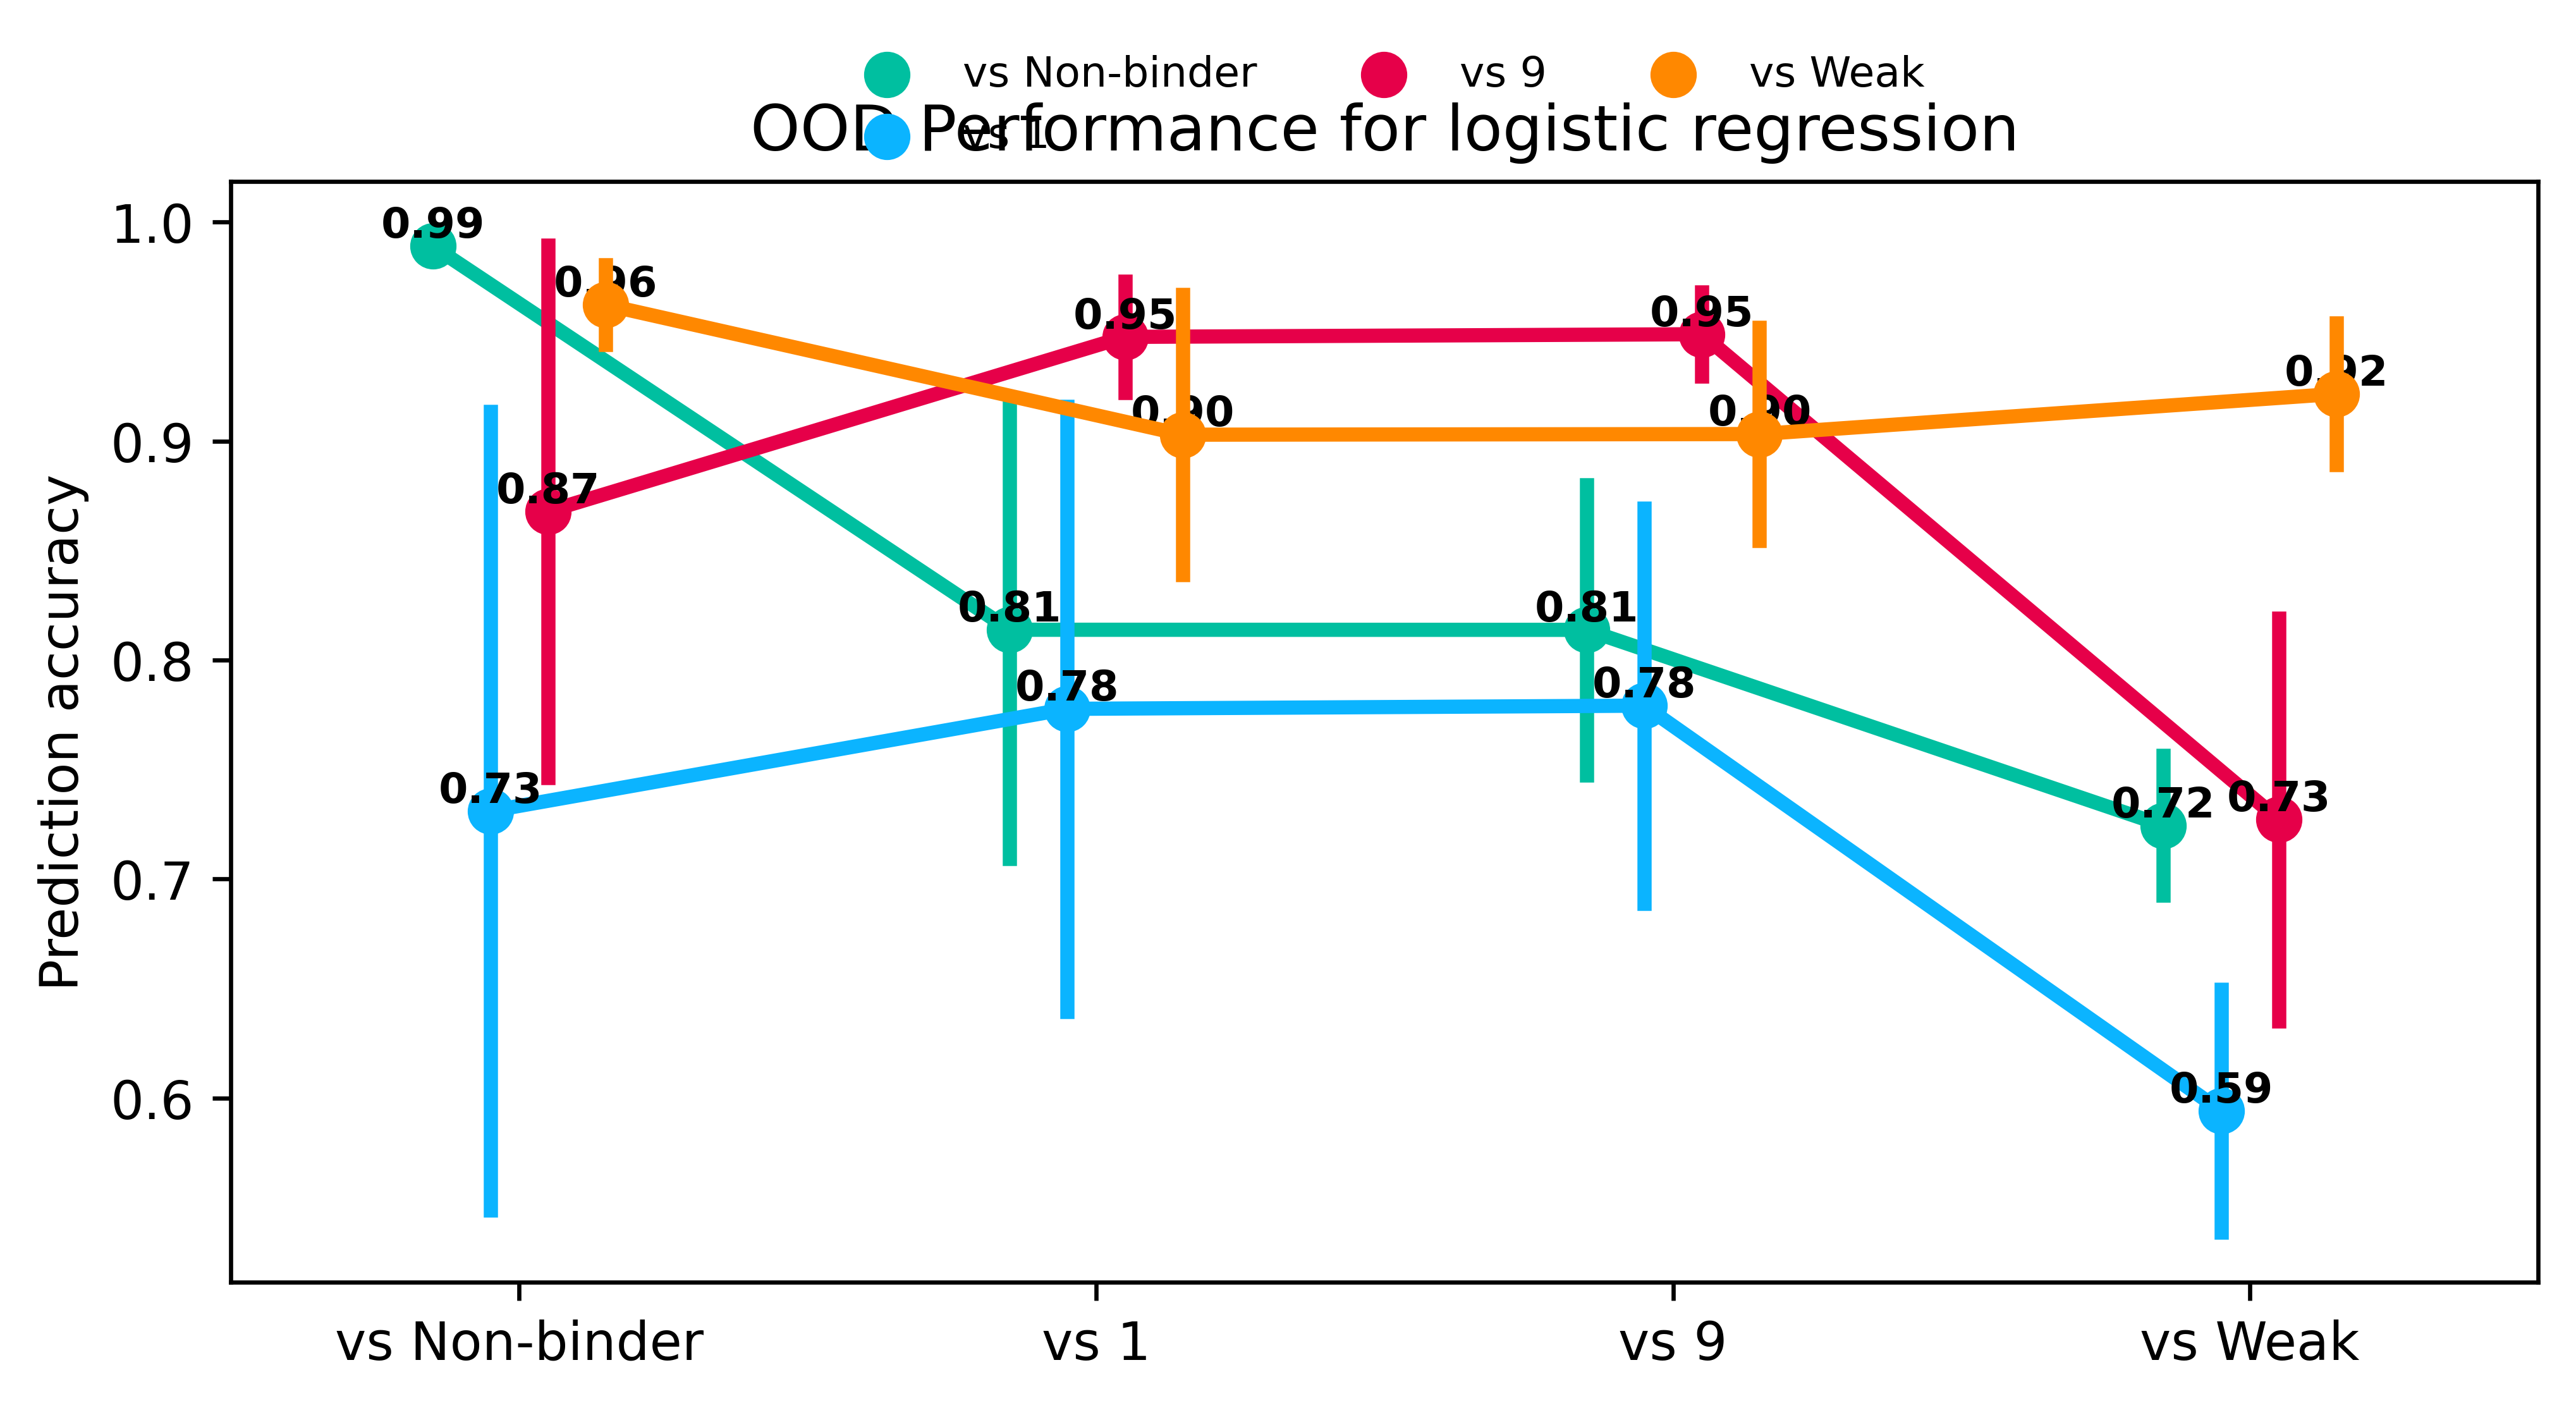

In [8]:
## CODE from 25_Section_1.ipynb

fig, ax = plt.subplots(figsize=(2.5 * 3.14, 1.2 * 3.14), dpi=600)
sns.pointplot(
    df_o,
    y="acc",
    x="test_task",
    errorbar="sd",
    order=task_order,
    hue="model_task",
    hue_order=task_order,
    palette=cmap,
    # Spread out the points a bit in horizontal
    dodge=0.3,
    ax=ax,
)

# Add legend horizontally on top of plot area, outside plot area
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=3,
    fontsize=8,
    frameon=False,
    # title="Model trained on",
    # title_fontsize=8,
)

ax.set_xlabel(None)
ax.set_ylabel("Prediction accuracy")

# Add text
for i, col in enumerate(ax.collections):
    for j, txt in enumerate(col.get_offsets()[:, 0]):
        ax.text(
            txt,
            col.get_offsets()[j, 1],
            f"{col.get_offsets()[j, 1]:.2f}",
            ha="center",
            va="bottom",
            color="black",
            fontsize=8,
            fontweight="bold",
        )

ax.set_title("OOD Performance for logistic regression")

# fig.savefig("figures/1D2.svg")
fig.show()